# Simple Linear Regression

## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 데이터셋 로딩 및 전처리

- kc_house_data: 미국 워싱턴주 시애틀 지역의 주택 가격 데이터를 포함한 공개 데이터셋
- **price: 주택의 판매 가격 (종속 변수, 목표 값).**
- **sqft_living: 주택의 실내 면적 (평방 피트).**

In [4]:
# # Download dataset file
# !wget "https://dongaackr-my.sharepoint.com/:x:/g/personal/sjkim_donga_ac_kr/ET2udlQfsxRAsvnlEtgzfi0B3HAMAmqP_Y2WRsbYrTvYaA?e=dN8Hti&download=1" -q -O kc_house_data.csv

    
# Load dataset file
data = pd.read_csv('kc_house_data.csv')

# Single linear regression 실습에 사용할 데이터 열만 수집 (price (정답), sqft_living (입력))
X, Y = data['sqft_living'], data['price']

# 데이터 값 확인
df = data[['sqft_living', 'price']]
print(df)

       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21608         1530  360000.0
21609         2310  400000.0
21610         1020  402101.0
21611         1600  400000.0
21612         1020  325000.0

[21613 rows x 2 columns]


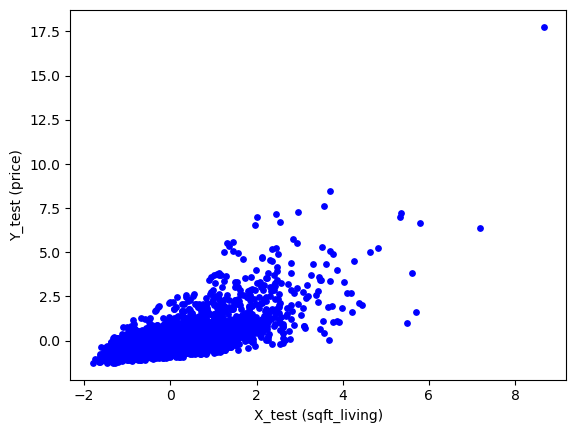

X_train: (17290, 1), Y_train: (17290, 1)
X_test: (4323, 1), Y_test: (4323, 1)


In [5]:
# Numpy 배열로 전환
X = np.array(X) # sqft_living
Y = np.array(Y) # price

# X, Y 각각에 대한 평균과 표준편차 계산
X_mean = np.mean(X)
Y_mean = np.mean(Y)
X_std = np.std(X)
Y_std = np.std(Y)

# 평균, 표준편차를 이용한 Gaussian 정규화 수행
X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# 2차원 행렬 변환
X = np.expand_dims(X, 1)
Y = np.expand_dims(Y, 1)

# Train dataset / Test dataset 분할 (8:2 비율)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

# Test dataset 시각화
fig = plt.figure()
plt.scatter(X_test, Y_test, color='b', marker='o', s=15)
plt.xlabel("X_test (sqft_living)")
plt.ylabel("Y_test (price)")
plt.show()

# 데이터 형상 확인
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

## Least Square Method 기반 선형 회귀 모델 작성

- 크기를 입력 받고 모두 1로 채워진 행렬 생성:
  ```python
  arr = np.ones(size)
  ```
- 2개 이상 행렬을 가로로 쌓기:
  ```python
  arr = np.hstack([a, b])
  ```
- 행렬 곱 (dot product):
  ```python
  arr = np.dot(a, b)
  ```
- 전치 행렬:
  ```python
  arr = a.T
  ```
- 역 행렬:
  ```python
  arr = np.linalg.inv(a)
  ```


- Least Square Method:
$$\theta = (X^T \cdot X)^{-1} \cdot (X^T \cdot Y)$$


In [4]:
class LinearRegression_LSM():
    """
    최소제곱법(Least Square Method)을 이용한 선형 회귀 모델 클래스
    
    최소제곱법 공식: θ = (X^T · X)^(-1) · (X^T · Y)을 이용하여 
    최적의 파라미터(θ)를 계산하는 선형 회귀 모델입니다.
    
    Attributes:
        theta: 학습된 모델 파라미터 (가중치와 편향)
    """
    
    # 클래스 초기화 함수
    def __init__(self):
        # 학습된 파라미터(theta)를 저장할 변수 초기화
        self.theta = None

    # 학습 함수 - Least Squares Method(최소제곱법)를 이용해 theta를 계산
    def fit(self, X, Y):
        N = X.shape[0]  # 입력 샘플 개수 (행 개수)

        # Bias term 추가를 위해 모든 샘플에 대해 1을 추가 (상수항을 위한 열)
        bias = np.ones((N, 1))      # (N x 1) 크기의 배열 생성
        X = np.hstack([X, bias])    # (N x 2) bias 열 추가

        # --------- Least Squares Method 수식 구현 ---------
        # Normal Equation: θ = (XᵀX)^(-1) XᵀY
        # X의 전치 행렬
        X_T = X.T

        # XᵀX 계산
        XTX = np.dot(X_T, X)

        # 역행렬 계산: (XᵀX)^(-1)
        XTX_inv = np.linalg.inv(XTX)

        # XᵀY 계산
        XTY = np.dot(X_T, Y)

        # 최종 파라미터 θ 계산: θ = (XᵀX)^(-1) XᵀY
        self.theta = np.dot(XTX_inv, XTY)


        return self.theta

    def predict(self, X):
        # 입력 X에 bias 항(상수항) 추가
        bias = np.ones((X.shape[0], 1))    # (N x 1)
        X = np.hstack([X, bias])           # (N x 2)

        # 예측값 계산: ŷ = Xθ
        pred = np.dot(X, self.theta)

        return pred


## X_train, Y_train 데이터를 이용한 linear regression 수행 (학습)

In [5]:
model_LSM = LinearRegression_LSM()
theta = model_LSM.fit(X_train, Y_train)

print(f"W = {theta[0]}, b = {theta[1]}")

W = [0.70406843], b = [0.00267388]


## X_test, Y_test 데이터를 이용한 linear regression 성능 검증 (테스트)

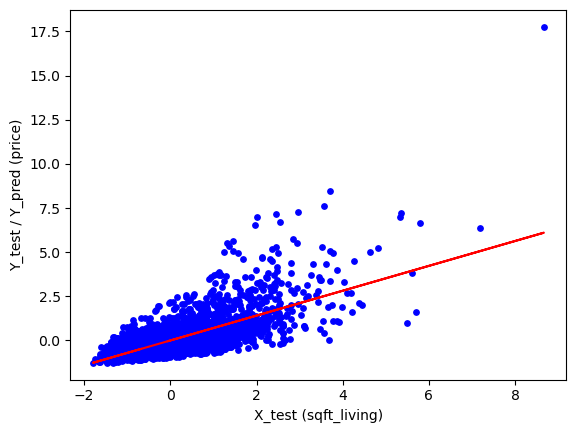

In [6]:
Y_pred = model_LSM.predict(X_test)

# 시각화
fig = plt.figure()
plt.scatter(X_test, Y_test, color='b', marker='o', s=15)
plt.plot(X_test, Y_pred, color='r')
plt.xlabel("X_test (sqft_living)")
plt.ylabel("Y_test / Y_pred (price)")
plt.show()

## Gradient Descent Method 기반 선형 회귀 모델 작성

In [6]:

class LinearRegression_GDM():
  """
  경사하강법(Gradient Descent Method)을 사용한 선형 회귀 모델 클래스입니다.
  
  Parameters
  ----------
  iteration : int, default=1000
      경사하강법의 반복 횟수
  learning_rate : float, default=1e-4  
      학습률(learning rate)
      
  Attributes
  ----------
  theta : ndarray
      학습된 모델의 파라미터 (w, b)
  """

  #def __init__(self, iteration=1000, learning_rate=0.1):
  def __init__(self, iteration=1000, learning_rate=1e-4):
    self.iteration = iteration              # 반복 횟수 설정
    self.learning_rate = learning_rate      # 학습률 설정
    self.theta = None                       # 학습된 파라미터 저장 변수

  def fit(self, X, Y):
    N = X.shape[0]                          # 데이터 개수

    # 행렬 X에 bias 열 추가
    bias = np.ones((N, 1))                  # (N x 1)
    X = np.hstack([X, bias])                # (N x 2)

    # w, b 초기값 설정
    w = 0.0
    b = 0.0

    for i in range(self.iteration):
      # [[w],
      #  [b]] 형태로 theta 행렬 생성
      theta = [w, b]
      theta = np.array([w, b]).reshape(2, 1)


      # y_hat 계산: 예측값 = X @ theta
      y_hat = np.dot(X, theta)


      # dw, db 계산
      # dw = (2/N) * sum((y - y_hat) * -X)
      dw = (2/N) * sum((Y - y_hat) * (-X[:, [0]]))

      # db = (2/N) * sum((y - y_hat) * -1)
      db = (2/N) * sum((Y - y_hat) * -1)


      # w, b 업데이트
      # w_t+1 = w_t - learning_rate * dw
      w = w - self.learning_rate * dw

      # b_t+1 = b_t - learning_rate * db
      b = b - self.learning_rate * db


    # 최종 학습된 theta 저장
    self.theta = np.array([w, b])  # (1차원 배열)

    return self.theta

  def predict(self, X):
    # 예측을 위한 bias 열 추가
    bias = np.ones((X.shape[0], 1))     # (N x 1)
    X = np.hstack([X, bias])            # (N x 2)

    # 예측값 계산
    pred = np.dot(X, self.theta)        # (N x 1)

    return pred


## X_train, Y_train 데이터를 이용한 linear regression 수행 (학습)

In [7]:
model_GDM = LinearRegression_GDM(iteration=1000, learning_rate=0.1)
theta = model_GDM.fit(X_train, Y_train)

print(f"W = {theta[0]}, b = {theta[1]}")

W = [0.70406843], b = [0.00267388]


## X_test, Y_test 데이터를 이용한 linear regression 성능 검증 (테스트)

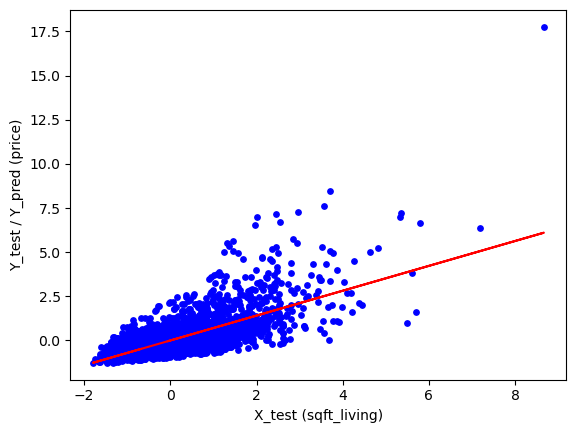

In [8]:
Y_pred = model_GDM.predict(X_test)

# 시각화
fig = plt.figure()
plt.scatter(X_test, Y_test, color='b', marker='o', s=15)
plt.plot(X_test, Y_pred, color='r')
plt.xlabel("X_test (sqft_living)")
plt.ylabel("Y_test / Y_pred (price)")
plt.show()

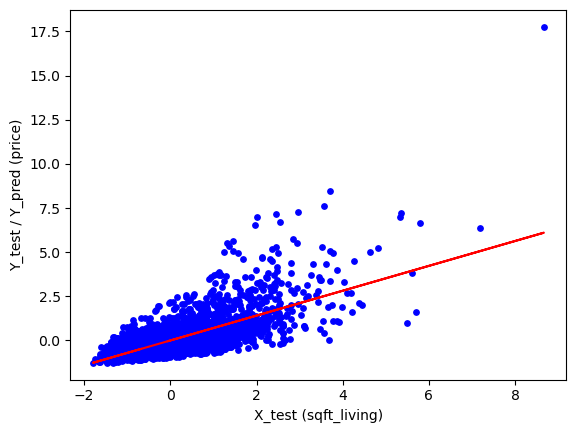

In [9]:
Y_pred = model_GDM.predict(X_test)

# 시각화
fig = plt.figure()
plt.scatter(X_test, Y_test, color='b', marker='o', s=15)
plt.plot(X_test, Y_pred, color='r')
plt.xlabel("X_test (sqft_living)")
plt.ylabel("Y_test / Y_pred (price)")
plt.show()